## Importing all the necessary libraries required

In [1]:
#importing necessary packages
import pandas as pd
import numpy as np

#Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
#filter warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
#importing ML libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [4]:
print(pd.__version__)
print(np.__version__)
print(sns.__version__)
print(sm.__version__)

2.1.4
1.26.4
0.13.1
0.14.2


## Reading the Dataset

In [5]:
data=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/day.csv')

In [6]:
data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


## Checking for Null values

In [7]:
data.isnull().mean()

instant       0.0
dteday        0.0
season        0.0
yr            0.0
mnth          0.0
holiday       0.0
weekday       0.0
workingday    0.0
weathersit    0.0
temp          0.0
atemp         0.0
hum           0.0
windspeed     0.0
casual        0.0
registered    0.0
cnt           0.0
dtype: float64

In [8]:
#Checking the basic information
data.info() # no null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [9]:
df=data.copy()
df

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,726,27-12-2019,1,1,12,0,4,1,2,10.420847,11.33210,65.2917,23.458911,247,1867,2114
726,727,28-12-2019,1,1,12,0,5,1,2,10.386653,12.75230,59.0000,10.416557,644,2451,3095
727,728,29-12-2019,1,1,12,0,6,0,2,10.386653,12.12000,75.2917,8.333661,159,1182,1341
728,729,30-12-2019,1,1,12,0,0,0,1,10.489153,11.58500,48.3333,23.500518,364,1432,1796


## Data Preprocessing

In [10]:
 #preprocessing the columns for better interpretation
df['season']=df['season'].map({1:'spring', 2:'summer', 3:'fall', 4:'winter'})
df['yr']=df['yr'].map({0:'2018', 1:'2019'})
df['weathersit']=df['weathersit'].map({1:'Clear', 2:'Mist', 3:'Light Snow', 4:'Heavy Rain'})
df['month']=pd.to_datetime(df['dteday'],format='%d-%m-%Y').dt.month_name()
df['dayofweek']=pd.to_datetime(df['dteday'],format='%d-%m-%Y').dt.day_name()


# renaming columns
df=df.rename(columns={'temp':'temperature','atemp':'ambient_temperature',
                    'hum':'humidity','yr':'year'})

In [11]:
df.head()

,instant,dteday,season,year,mnth,holiday,weekday,workingday,weathersit,temperature,ambient_temperature,humidity,windspeed,casual,registered,cnt,month,dayofweek
0,1,01-01-2018,spring,2018,1,0,6,0,Mist,14.110847,18.18125,80.5833,10.749882,331,654,985,January,Monday
1,2,02-01-2018,spring,2018,1,0,0,0,Mist,14.902598,17.68695,69.6087,16.652113,131,670,801,January,Tuesday
2,3,03-01-2018,spring,2018,1,0,1,1,Clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349,January,Wednesday
3,4,04-01-2018,spring,2018,1,0,2,1,Clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562,January,Thursday
4,5,05-01-2018,spring,2018,1,0,3,1,Clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600,January,Friday


In [12]:
#dropping the columns which won't be required in the further analysis
df=df.drop(['instant','dteday','weekday','mnth'],axis=1)
#dropping instant column as its similar to index
#dropping weekday column as its similar to dayofweek column which is more interpretable

In [13]:
df.head(5)

,season,year,holiday,workingday,weathersit,temperature,ambient_temperature,humidity,windspeed,casual,registered,cnt,month,dayofweek
0,spring,2018,0,0,Mist,14.110847,18.18125,80.5833,10.749882,331,654,985,January,Monday
1,spring,2018,0,0,Mist,14.902598,17.68695,69.6087,16.652113,131,670,801,January,Tuesday
2,spring,2018,0,1,Clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349,January,Wednesday
3,spring,2018,0,1,Clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562,January,Thursday
4,spring,2018,0,1,Clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600,January,Friday


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   season               730 non-null    object 
 1   year                 730 non-null    object 
 2   holiday              730 non-null    int64  
 3   workingday           730 non-null    int64  
 4   weathersit           730 non-null    object 
 5   temperature          730 non-null    float64
 6   ambient_temperature  730 non-null    float64
 7   humidity             730 non-null    float64
 8   windspeed            730 non-null    float64
 9   casual               730 non-null    int64  
 10  registered           730 non-null    int64  
 11  cnt                  730 non-null    int64  
 12  month                730 non-null    object 
 13  dayofweek            730 non-null    object 
dtypes: float64(4), int64(5), object(5)
memory usage: 80.0+ KB


## Basic Exploratory Data Analysis

### Pairplots to Visualize relationship between variables

<Figure size 640x480 with 0 Axes>

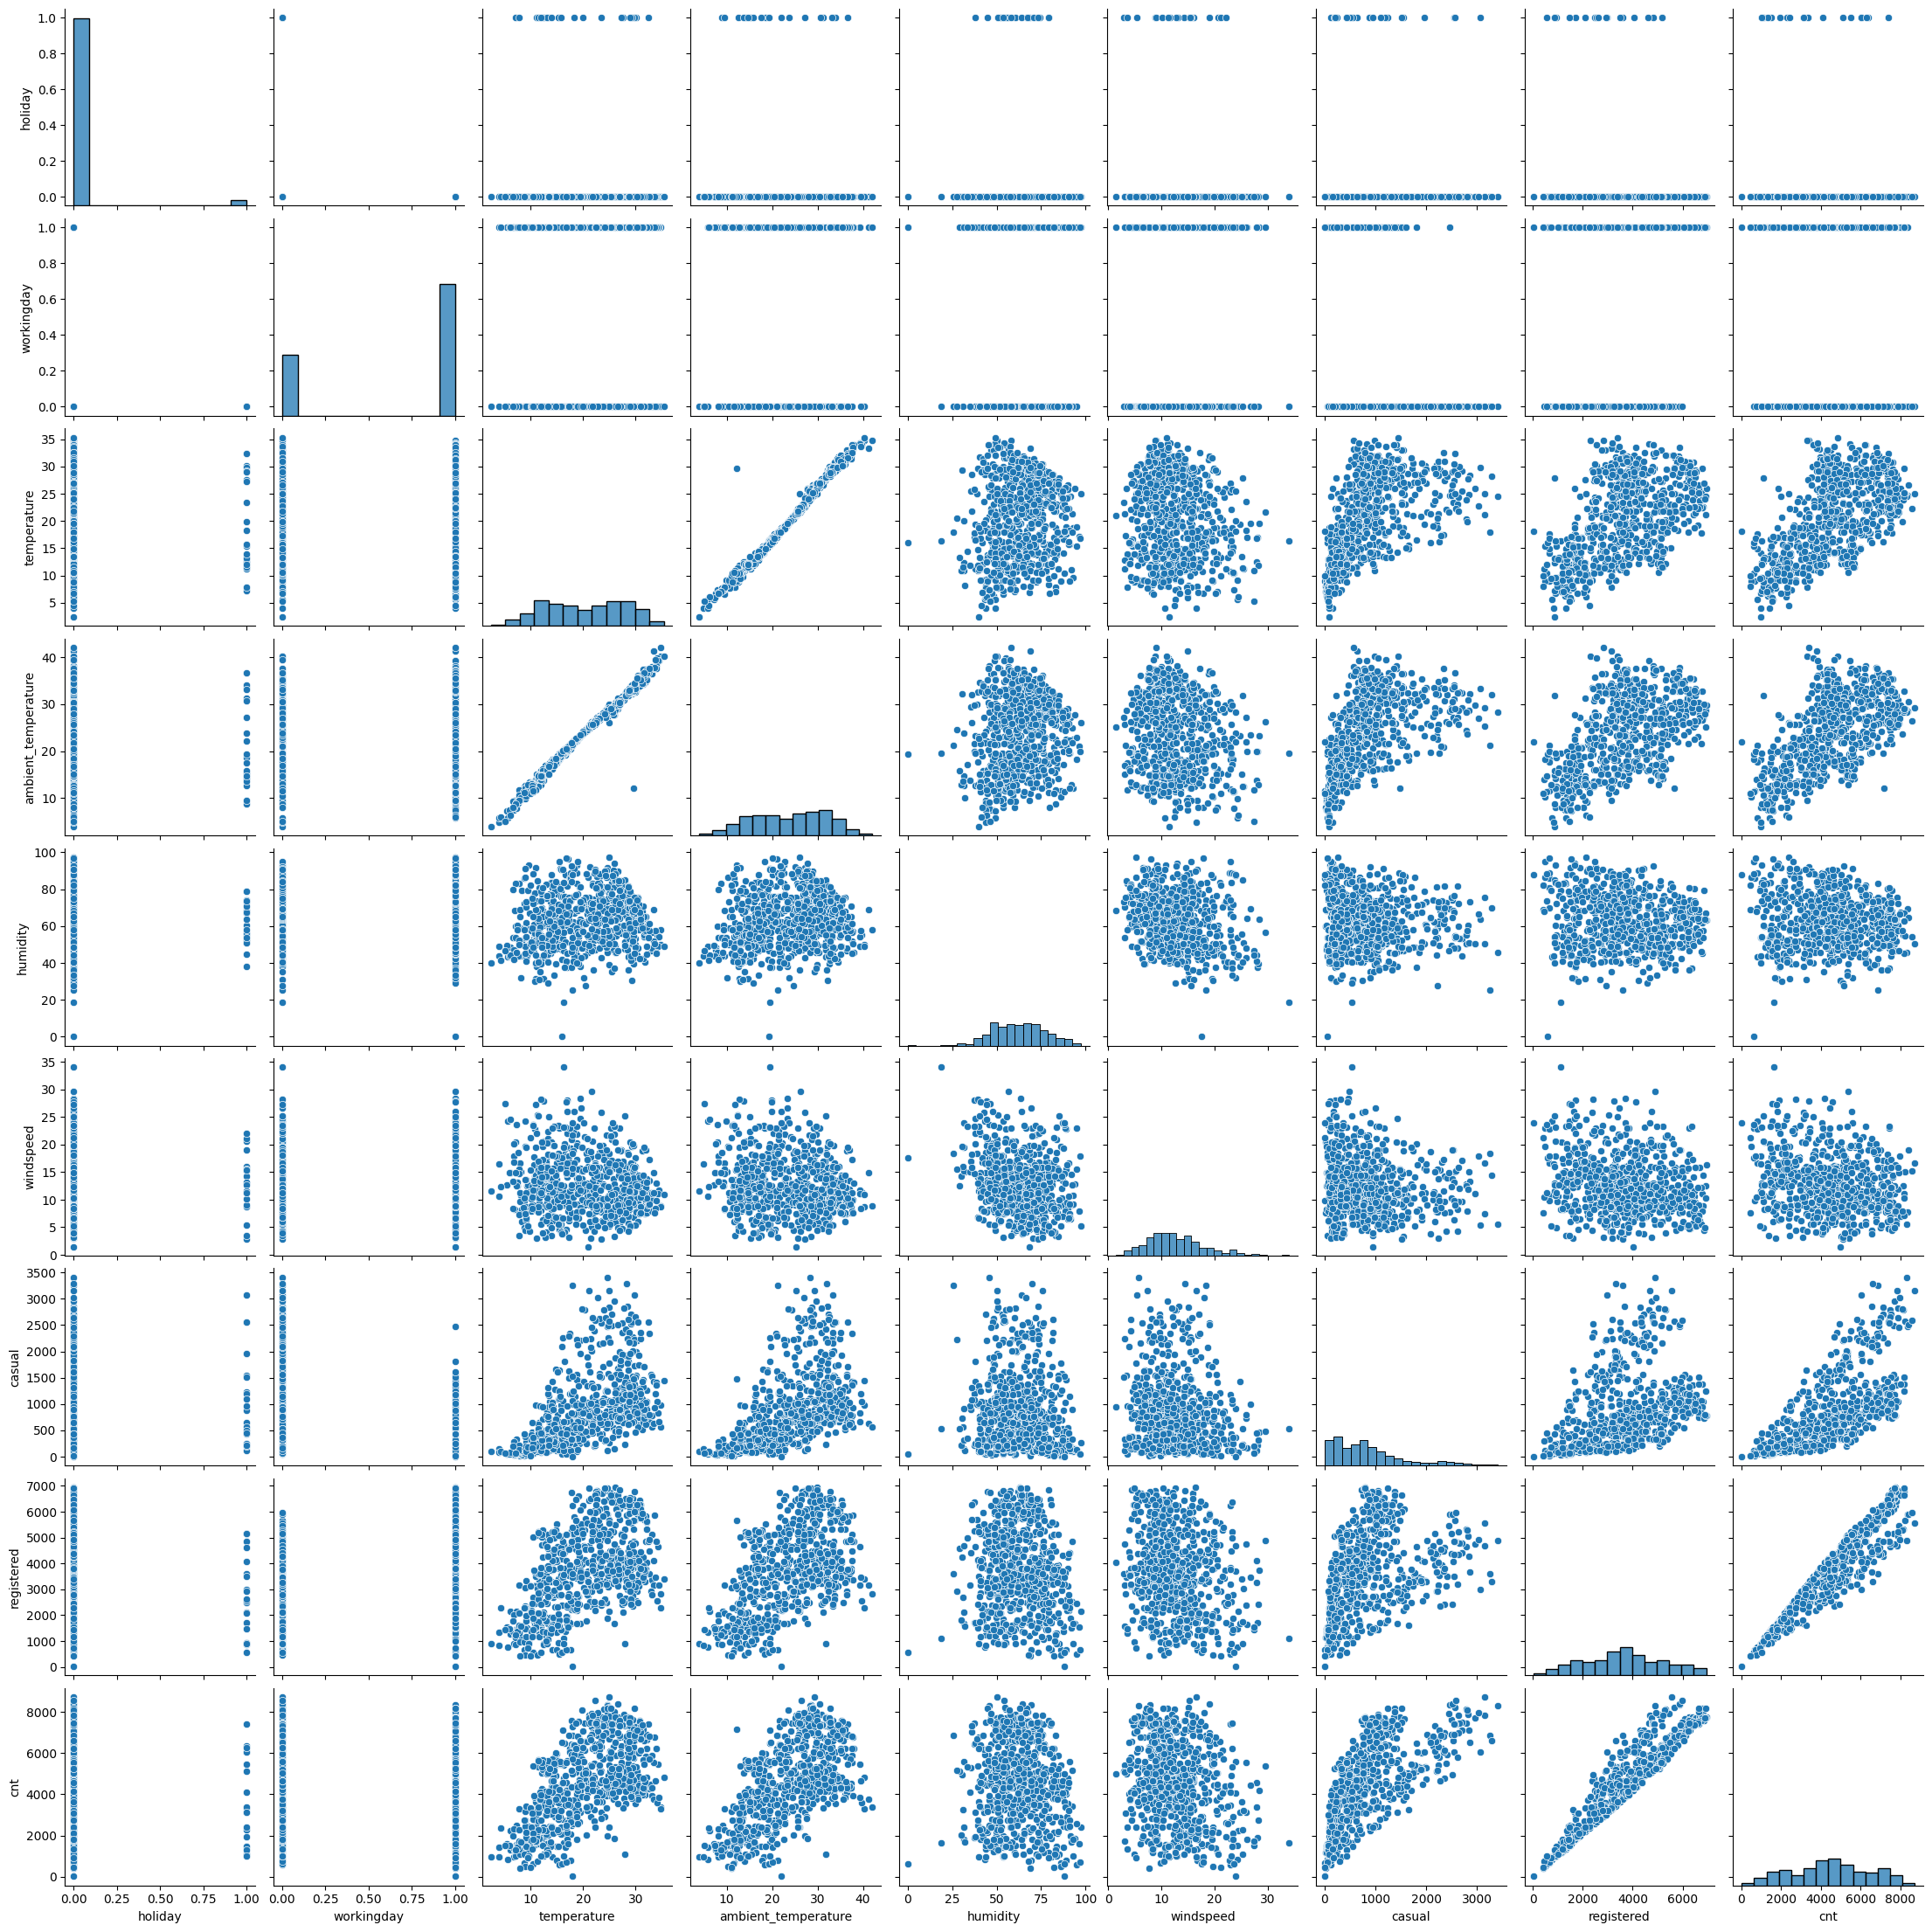

In [15]:
#plots to check distribution/relationship among the variables
plt.figure()
plt.tight_layout()
sns.pairplot(df)
plt.show()



1.   Linear relationship between temperature and the count variable
2.   Variable casual and registered are related to count
3.   Variable temp and atemp (ambient temp) are related




### Boxplots for categorical Variables

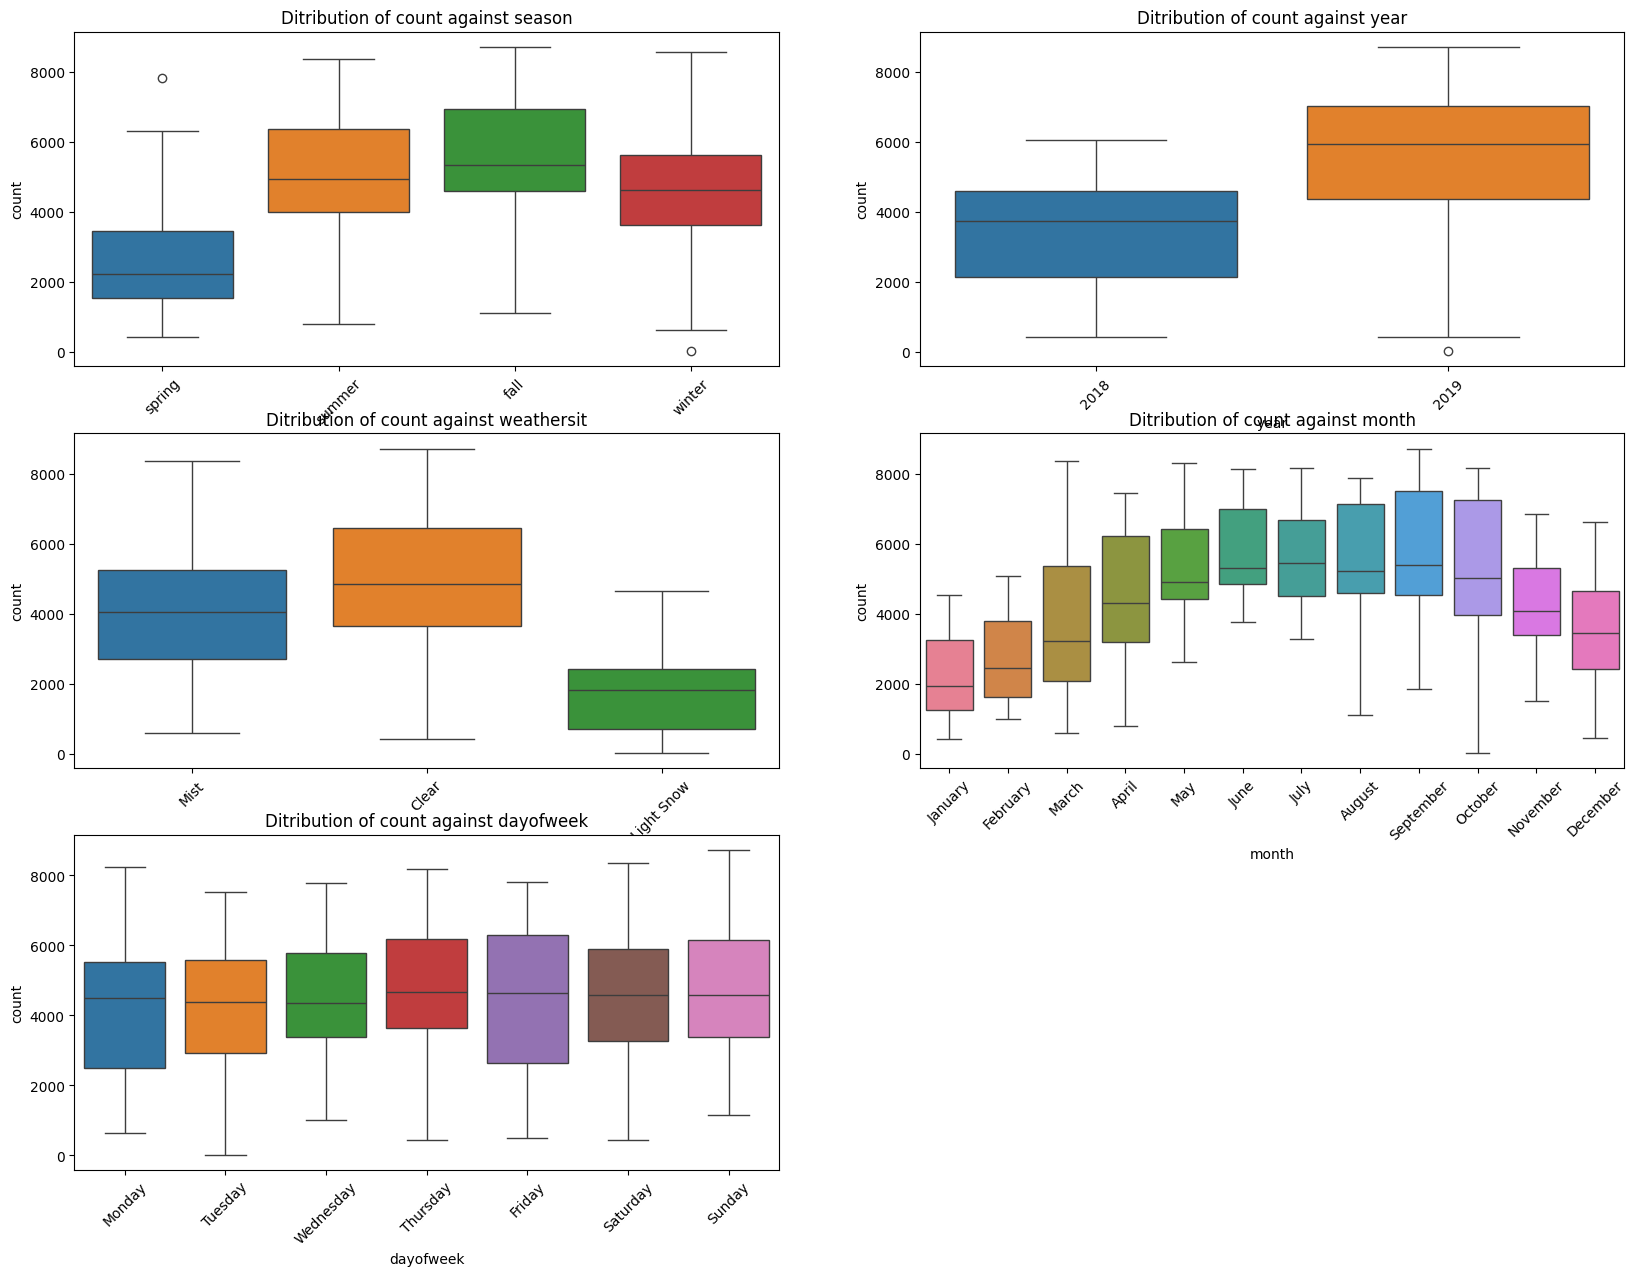

In [16]:
#visualizing the categorical variable
cat_cols=(df.select_dtypes(include='object')).columns
plt.figure(figsize=(20,20))
plt.tight_layout()
for i,cols in enumerate(cat_cols):
  ax=plt.subplot(4,len(cat_cols)//2,i+1)
  sns.boxplot(x=cols,y='cnt',data=df,ax=ax,hue=cols)
  ax.set_title('Ditribution of count against {}'.format(cols))
  ax.set_xlabel(cols)
  ax.set_ylabel('count')
  plt.xticks(rotation=45)
plt.show()

#### Findings from the above visulaization


1.   We see considerable amount of decrease in usage of the services during spring season
2.   Increae usage of service during non holiday seasons could suggest people are using it to commute of work
3. Particulary non visible difference across weekdays, weekends, working and non working day
4. Customers prefer to use the service when its clear day as shown in the by weather plot
5. Year versus count plot show that the usage has increased over time
6. Usage across the months clearly supports that the usage across *season*



# Data Preprocessing for Modelling

In [17]:
df.head()

,season,year,holiday,workingday,weathersit,temperature,ambient_temperature,humidity,windspeed,casual,registered,cnt,month,dayofweek
0,spring,2018,0,0,Mist,14.110847,18.18125,80.5833,10.749882,331,654,985,January,Monday
1,spring,2018,0,0,Mist,14.902598,17.68695,69.6087,16.652113,131,670,801,January,Tuesday
2,spring,2018,0,1,Clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349,January,Wednesday
3,spring,2018,0,1,Clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562,January,Thursday
4,spring,2018,0,1,Clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600,January,Friday


In [18]:
df=df.drop(['casual','registered'],axis=1) # dropping variable casual and registered as they are correlated
df.head()

,season,year,holiday,workingday,weathersit,temperature,ambient_temperature,humidity,windspeed,cnt,month,dayofweek
0,spring,2018,0,0,Mist,14.110847,18.18125,80.5833,10.749882,985,January,Monday
1,spring,2018,0,0,Mist,14.902598,17.68695,69.6087,16.652113,801,January,Tuesday
2,spring,2018,0,1,Clear,8.050924,9.47025,43.7273,16.636703,1349,January,Wednesday
3,spring,2018,0,1,Clear,8.200000,10.60610,59.0435,10.739832,1562,January,Thursday
4,spring,2018,0,1,Clear,9.305237,11.46350,43.6957,12.522300,1600,January,Friday


## Creating Dummy variables

 Creating dummies for Season, year, weathersit and dayofweek variables

In [19]:
#Creating dummies out of variables
season_dummies=pd.get_dummies(df['season'],drop_first=True,dtype=int)
year_dummies=pd.get_dummies(df['year'],drop_first=True,dtype=int)
weathersit_dummies=pd.get_dummies(df['weathersit'],drop_first=True,dtype=int)
dayofweek_dummies=pd.get_dummies(df['dayofweek'],drop_first=True,dtype=int)
month_dummies=pd.get_dummies(df['month'],drop_first=True,dtype=int)

In [20]:
print(season_dummies.head())
print(month_dummies.head())

   spring  summer  winter
0       1       0       0
1       1       0       0
2       1       0       0
3       1       0       0
4       1       0       0
   August  December  February  January  July  June  March  May  November  \
0       0         0         0        1     0     0      0    0         0   
1       0         0         0        1     0     0      0    0         0   
2       0         0         0        1     0     0      0    0         0   
3       0         0         0        1     0     0      0    0         0   
4       0         0         0        1     0     0      0    0         0   

   October  September  
0        0          0  
1        0          0  
2        0          0  
3        0          0  
4        0          0  


In [21]:
df=pd.concat([df,season_dummies,year_dummies,weathersit_dummies,dayofweek_dummies,month_dummies],axis=1)

In [22]:
df.columns

Index(['season', 'year', 'holiday', 'workingday', 'weathersit', 'temperature',
       'ambient_temperature', 'humidity', 'windspeed', 'cnt', 'month',
       'dayofweek', 'spring', 'summer', 'winter', '2019', 'Light Snow', 'Mist',
       'Monday', 'Saturday', 'Sunday', 'Thursday', 'Tuesday', 'Wednesday',
       'August', 'December', 'February', 'January', 'July', 'June', 'March',
       'May', 'November', 'October', 'September'],
      dtype='object')

In [23]:
df=df.drop(columns=['season','year','month','weathersit','dayofweek'],axis=1)

In [24]:
df.head()

,holiday,workingday,temperature,ambient_temperature,humidity,windspeed,cnt,spring,summer,winter,...,December,February,January,July,June,March,May,November,October,September
0,0,0,14.110847,18.18125,80.5833,10.749882,985,1,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,14.902598,17.68695,69.6087,16.652113,801,1,0,0,...,0,0,1,0,0,0,0,0,0,0
2,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,0,...,0,0,1,0,0,0,0,0,0,0
4,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,0,...,0,0,1,0,0,0,0,0,0,0


## Splitting the dataset into train and test

In [25]:
#Spliting the data into train and test split
df_train, df_test=train_test_split(df,train_size=0.7,random_state=100)

In [26]:
#Checking the dimensions for train & test
df_train.shape, df_test.shape

((510, 30), (220, 30))

## Scaling the Numeric Variables

In [27]:
#selecting the numeric columns to be scaled
num_cols=['temperature', 'ambient_temperature', 'humidity', 'windspeed', 'cnt']
num_cols

['temperature', 'ambient_temperature', 'humidity', 'windspeed', 'cnt']

In [28]:
df

,holiday,workingday,temperature,ambient_temperature,humidity,windspeed,cnt,spring,summer,winter,...,December,February,January,July,June,March,May,November,October,September
0,0,0,14.110847,18.18125,80.5833,10.749882,985,1,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,14.902598,17.68695,69.6087,16.652113,801,1,0,0,...,0,0,1,0,0,0,0,0,0,0
2,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,0,...,0,0,1,0,0,0,0,0,0,0
4,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,0,1,10.420847,11.33210,65.2917,23.458911,2114,1,0,0,...,1,0,0,0,0,0,0,0,0,0
726,0,1,10.386653,12.75230,59.0000,10.416557,3095,1,0,0,...,1,0,0,0,0,0,0,0,0,0
727,0,0,10.386653,12.12000,75.2917,8.333661,1341,1,0,0,...,1,0,0,0,0,0,0,0,0,0
728,0,0,10.489153,11.58500,48.3333,23.500518,1796,1,0,0,...,1,0,0,0,0,0,0,0,0,0


In [29]:
#creating the scaler variable
scaler=MinMaxScaler()

In [30]:
#scaling the numeric variable using the MinMacScaler
df_train[num_cols]=scaler.fit_transform(df_train[num_cols])
df_train.head()

,holiday,workingday,temperature,ambient_temperature,humidity,windspeed,cnt,spring,summer,winter,...,December,February,January,July,June,March,May,November,October,September
576,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,0,...,0,0,0,1,0,0,0,0,0,0
426,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,1,0,0,...,0,0,0,0,0,1,0,0,0,0
728,0,0,0.245101,0.200348,0.498067,0.663106,0.204096,1,0,0,...,1,0,0,0,0,0,0,0,0,0
482,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,0,1,0,...,0,0,0,0,0,0,0,0,0,0
111,0,1,0.345824,0.318819,0.751824,0.380981,0.191095,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [31]:
#Describing the dataset for checking the min and max of scaled varaibale
df_train.describe()

,holiday,workingday,temperature,ambient_temperature,humidity,windspeed,cnt,spring,summer,winter,...,December,February,January,July,June,March,May,November,October,September
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.025490,0.676471,0.537440,0.513156,0.650480,0.320883,0.513499,0.243137,0.247059,0.247059,...,0.084314,0.066667,0.088235,0.076471,0.076471,0.098039,0.084314,0.086275,0.084314,0.080392
std,0.157763,0.468282,0.225858,0.212410,0.145846,0.169803,0.224421,0.429398,0.431725,0.431725,...,0.278131,0.249689,0.283915,0.266010,0.266010,0.297660,0.278131,0.281045,0.278131,0.272166
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,1.000000,0.542596,0.529718,0.653714,0.296763,0.518638,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<Axes: >

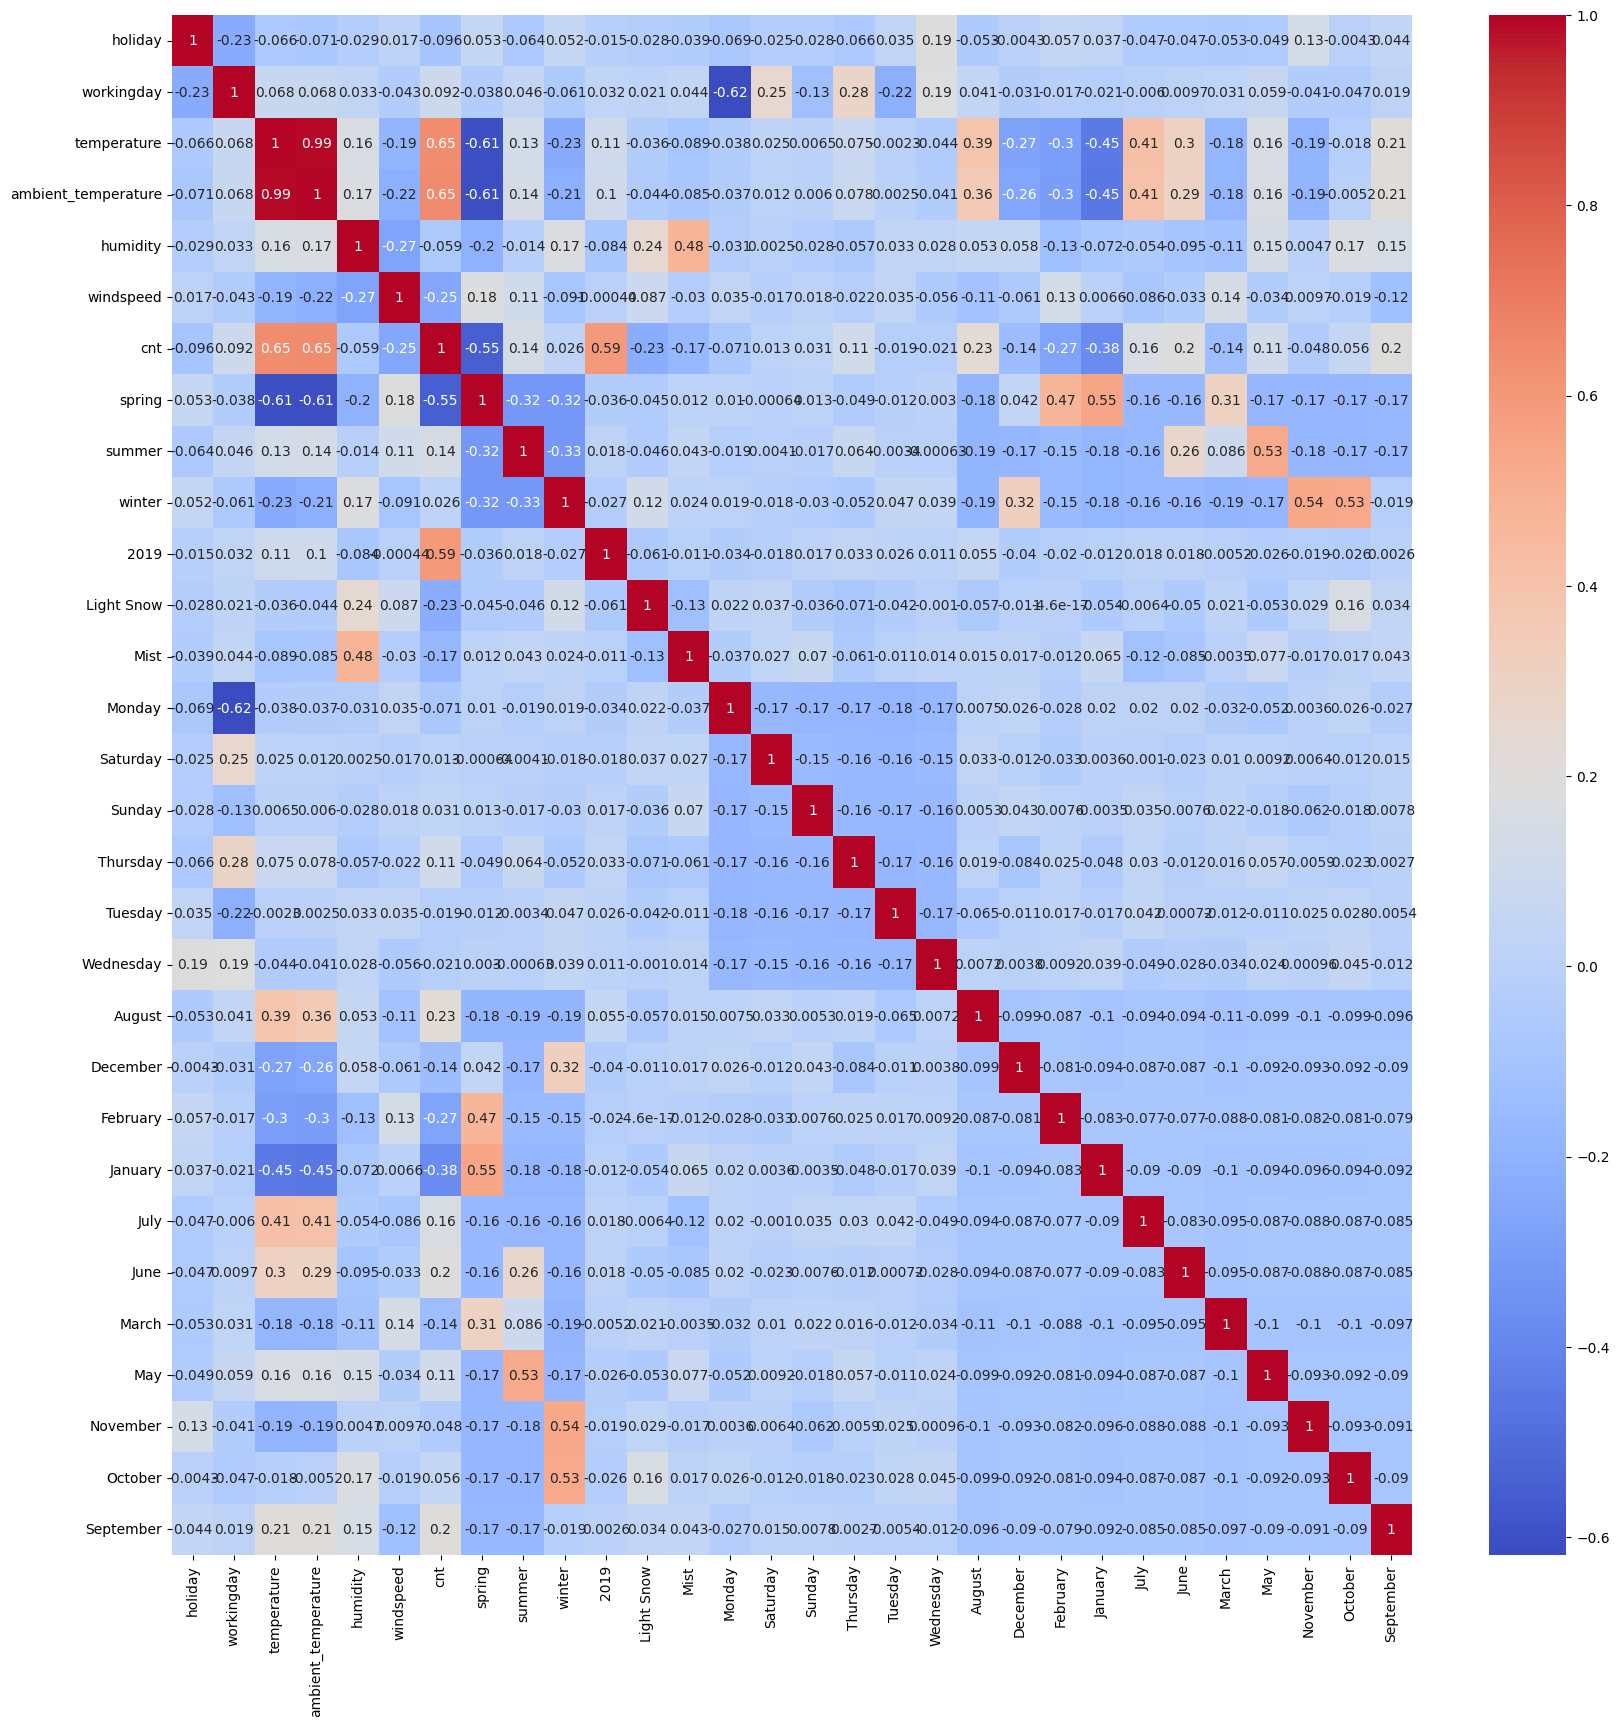

In [32]:
#checking the correlation between varaibles
corr=df_train.corr()
plt.figure(figsize=(20,20))
sns.heatmap(corr, annot=True,cmap='coolwarm')



*   From the correlation plot we can see that temperature variables are correlated to out Target Variable
*   We can see high correlation between our predictor variables temperature and ambient temperature



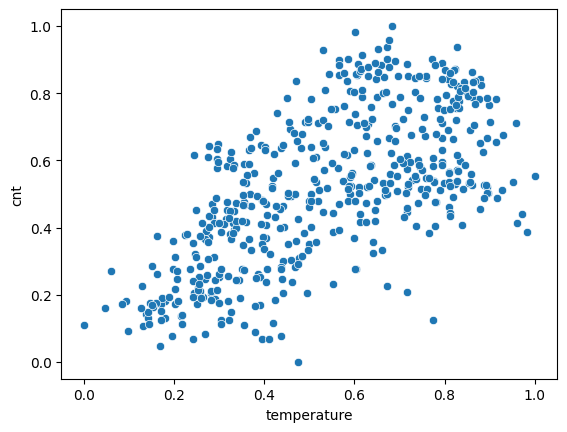

In [33]:
plt.figure()
sns.scatterplot(x='temperature',y='cnt',data=df_train)
plt.show()

## Splitting the train dataset into X and y variables for model building

In [34]:
X_train=df_train.drop('cnt',axis=1)
y_train=df_train['cnt']

In [35]:
df_train.dtypes

holiday                  int64
workingday               int64
temperature            float64
ambient_temperature    float64
humidity               float64
windspeed              float64
cnt                    float64
spring                   int64
summer                   int64
winter                   int64
2019                     int64
Light Snow               int64
Mist                     int64
Monday                   int64
Saturday                 int64
Sunday                   int64
Thursday                 int64
Tuesday                  int64
Wednesday                int64
August                   int64
December                 int64
February                 int64
January                  int64
July                     int64
June                     int64
March                    int64
May                      int64
November                 int64
October                  int64
September                int64
dtype: object

## Reusable Code Modules for Model Building and VIF

In [36]:
#Reusable Model function for STatsmodel
def Stats_model(X,y):
  X_lm=sm.add_constant(X)
  lr=sm.OLS(y,X_lm).fit()
  return lr,X_lm

In [37]:
#Reusable model for VIF
def vif(Xt):
  vif = pd.DataFrame()
  vif['Features'] = Xt.columns
  vif['VIF'] = [variance_inflation_factor(Xt.values, i) for i in range(Xt.shape[1])]
  vif['VIF'] = round(vif['VIF'], 2)
  vif = vif.sort_values(by = "VIF", ascending = False)
  return vif

## Model Building

### Model 1- With all features

In [38]:
#creating linear model using statsmodel library
lr,X_lm=Stats_model(X_train,y_train)
print(lr.params)
print(lr.summary())
X_lm.head(5)

const                  0.329747
holiday               -0.083461
workingday             0.000185
temperature            0.390731
ambient_temperature    0.052804
humidity              -0.157039
windspeed             -0.180980
spring                -0.040568
summer                 0.045983
winter                 0.111380
2019                   0.231623
Light Snow            -0.249130
Mist                  -0.057640
Monday                -0.024547
Saturday               0.003832
Sunday                 0.009720
Thursday               0.004068
Tuesday               -0.025765
Wednesday             -0.009436
August                 0.028279
December              -0.043684
February              -0.036799
January               -0.063637
July                  -0.028106
June                   0.008986
March                  0.000889
May                    0.024868
November              -0.040744
October                0.006366
September              0.091574
dtype: float64
                         

,const,holiday,workingday,temperature,ambient_temperature,humidity,windspeed,spring,summer,winter,...,December,February,January,July,June,March,May,November,October,September
576,1.0,0,1,0.815169,0.766351,0.725633,0.264686,0,0,0,...,0,0,0,1,0,0,0,0,0,0
426,1.0,0,0,0.442393,0.438975,0.640189,0.255342,1,0,0,...,0,0,0,0,0,1,0,0,0,0
728,1.0,0,0,0.245101,0.200348,0.498067,0.663106,1,0,0,...,1,0,0,0,0,0,0,0,0,0
482,1.0,0,0,0.395666,0.391735,0.504508,0.188475,0,1,0,...,0,0,0,0,0,0,0,0,0,0
111,1.0,0,1,0.345824,0.318819,0.751824,0.380981,0,1,0,...,0,0,0,0,0,0,0,0,0,0


It appears that a lot of variable are insignificant to make sure that we are moving in the right direction we'll be using VIF

### VIF - Variable Inflation Factor Test_ Model 1

In [39]:
vif(X_train)

,Features,VIF
2,temperature,436.22
3,ambient_temperature,382.58
4,humidity,38.31
6,spring,12.05
8,winter,11.80
1,workingday,8.53
7,summer,7.40
27,October,6.36
26,November,6.17
18,August,6.12


### LR Model 2

In [40]:
#Dropping ambient temperature variable as its VIF is high and is less significant
X=X_train.drop('ambient_temperature',axis=1)

In [41]:
#Calling model building fuction for updated dataset
lr,X_lm=Stats_model(X,y_train)
print(lr.params)
print(lr.summary())

const          0.329678
holiday       -0.083847
workingday     0.000381
temperature    0.442094
humidity      -0.156548
windspeed     -0.183152
spring        -0.040087
summer         0.046578
winter         0.111875
2019           0.231535
Light Snow    -0.249820
Mist          -0.057686
Monday        -0.024312
Saturday       0.003425
Sunday         0.009809
Thursday       0.004095
Tuesday       -0.025615
Wednesday     -0.009414
August         0.026601
December      -0.043651
February      -0.036909
January       -0.063821
July          -0.029184
June           0.007721
March          0.000674
May            0.024086
November      -0.040734
October        0.006243
September      0.090864
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:

In [42]:
#Recalculating the VIF
vif(X)

,Features,VIF
3,humidity,38.27
2,temperature,37.87
5,spring,12.02
7,winter,11.78
1,workingday,8.52
6,summer,7.36
26,October,6.36
25,November,6.17
17,August,5.99
21,July,5.39


### LR- Model 3

In [43]:
#dropping humidity as it has high VIF and significance values
X=X.drop('humidity',axis=1)

In [44]:
#Calling model building fuction for updated dataset
lr,X_lm=Stats_model(X,y_train)
print(lr.params)
print(lr.summary())

const          0.266407
holiday       -0.082357
workingday     0.000422
temperature    0.390706
windspeed     -0.154572
spring        -0.044467
summer         0.037370
winter         0.108040
2019           0.235353
Light Snow    -0.292158
Mist          -0.081908
Monday        -0.023516
Saturday       0.006685
Sunday         0.013278
Thursday       0.006143
Tuesday       -0.027880
Wednesday     -0.008846
August         0.023430
December      -0.066334
February      -0.050594
January       -0.083256
July          -0.025300
June           0.015732
March         -0.007239
May            0.017050
November      -0.057975
October       -0.011755
September      0.078890
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     97.

In [45]:
#Recalculating the VIF
vif(X)

,Features,VIF
2,temperature,28.37
4,spring,11.59
6,winter,11.59
1,workingday,8.39
5,summer,6.42
25,October,5.95
16,August,5.81
24,November,5.64
20,July,5.34
3,windspeed,5.01


### LR- Model 4

In [46]:
# High VIF and less significant
X=X.drop('spring',axis=1)

In [47]:
#Calling model building fuction for updated dataset
lr,X_lm=Stats_model(X,y_train)
print(lr.params)
print(lr.summary())

const          0.238113
holiday       -0.082432
workingday     0.000939
temperature    0.398665
windspeed     -0.157247
summer         0.062604
winter         0.132843
2019           0.235071
Light Snow    -0.290109
Mist          -0.081793
Monday        -0.023908
Saturday       0.006058
Sunday         0.013725
Thursday       0.006544
Tuesday       -0.027920
Wednesday     -0.008846
August         0.045802
December      -0.070922
February      -0.068294
January       -0.100439
July          -0.003398
June           0.022301
March         -0.019080
May            0.015395
November      -0.056985
October       -0.012009
September      0.096530
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     100.7
Date:                

In [48]:
#recalculating the VIF
vif(X)

,Features,VIF
2,temperature,27.39
1,workingday,8.21
5,winter,8.03
24,October,5.71
23,November,5.33
15,August,5.19
3,windspeed,4.83
19,July,4.78
4,summer,4.51
25,September,3.86


### LR Model-5

In [49]:
# Dropping workingday it has high VIF and low significance
X=X.drop('workingday',axis=1)

In [50]:
#Calling model building fuction for updated dataset
lr,X_lm=Stats_model(X,y_train)
print(lr.params)
print(lr.summary())

const          0.239074
holiday       -0.083199
temperature    0.398623
windspeed     -0.157210
summer         0.062591
winter         0.132845
2019           0.235085
Light Snow    -0.290086
Mist          -0.081765
Monday        -0.024847
Saturday       0.006056
Sunday         0.013289
Thursday       0.006547
Tuesday       -0.028420
Wednesday     -0.008859
August         0.045795
December      -0.070963
February      -0.068356
January       -0.100489
July          -0.003369
June           0.022309
March         -0.019121
May            0.015374
November      -0.057042
October       -0.012074
September      0.096524
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     104.9
Date:                Tue, 30 Jul 2024   Prob 

In [51]:
#recalculating the VIF
vif(X)

,Features,VIF
1,temperature,25.11
4,winter,8.03
23,October,5.57
14,August,5.12
22,November,5.08
18,July,4.74
2,windspeed,4.72
3,summer,4.25
24,September,3.75
15,December,3.29


Now we see that from the above table that almost all the VIF are in range except the temperature variable so we will go abot removing the variable based on significance


##LR Model 6- Final model

In [52]:
#Dropping variables with high significance value
X=X.drop(columns=['July','October','Saturday','Thursday','Sunday','March','May','June','Wednesday'],axis=1)

In [53]:
#Calling model building fuction for updated dataset
lr,X_lm=Stats_model(X,y_train)
print(lr.params)
print(lr.summary())

const          0.211011
holiday       -0.090962
temperature    0.439084
windspeed     -0.157634
summer         0.077966
winter         0.131546
2019           0.234067
Light Snow    -0.293490
Mist          -0.081709
Monday        -0.027510
Tuesday       -0.031798
August         0.045366
December      -0.051500
February      -0.047480
January       -0.077589
November      -0.039710
September      0.101406
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     165.0
Date:                Tue, 30 Jul 2024   Prob (F-statistic):          4.10e-186
Time:                        14:55:28   Log-Likelihood:                 510.43
No. Observations:                 510   AIC:                            -986.9
Df Residuals:           

In [54]:
#recalculating the VIF values
vif(X)

,Features,VIF
1,temperature,5.24
2,windspeed,3.98
4,winter,2.63
5,2019,2.06
3,summer,2.04
14,November,1.82
10,August,1.63
7,Mist,1.57
11,December,1.42
15,September,1.35


In [55]:
X_train_final=X

## Residual Analysis on the Train Data

In [56]:
y_train_count=lr.predict(X_lm)

Text(0.5, 0, 'Errors')

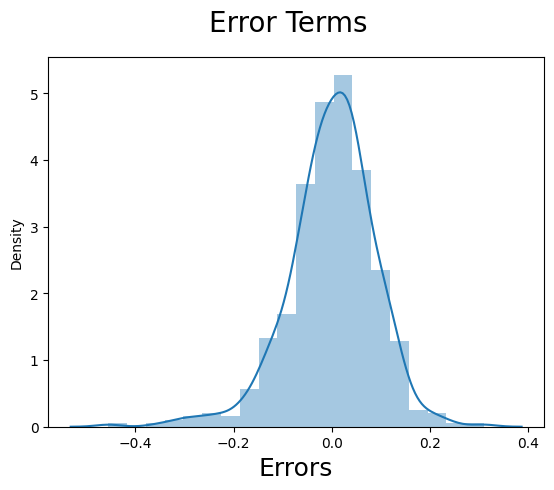

In [57]:
fig = plt.figure()
sns.distplot((y_train - y_train_count), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading
plt.xlabel('Errors', fontsize = 18)

Errors terms for the above predicted value follow a normal distribution

## Predicting on the test set

In [58]:
#Scaling the test based on the scaler used for the test set
df_test[num_cols]=scaler.transform(df_test[num_cols])

### Dividing the test into X(predictor) and y(Target Variable)

In [59]:
X_test=df_test.drop('cnt',axis=1)
y_test=df_test['cnt']

In [60]:
#Subsetting the test dataset based on the train set columns
X_test_lm=X_test[X_train_final.columns]
#adding the constant variable to the test set
X_test_lm=sm.add_constant(X_test_lm)


In [61]:
X_test_lm

,const,holiday,temperature,windspeed,summer,winter,2019,Light Snow,Mist,Monday,Tuesday,August,December,February,January,November,September
184,1.0,1,0.831783,0.084219,0,0,0,0,1,0,0,0,0,0,0,0,0
535,1.0,0,0.901354,0.153728,1,0,1,0,0,0,0,0,0,0,0,0,0
299,1.0,0,0.511964,0.334206,0,1,0,0,1,0,0,0,0,0,0,0,0
221,1.0,0,0.881625,0.339570,0,0,0,0,0,0,0,1,0,0,0,0,0
152,1.0,0,0.817246,0.537414,1,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
702,1.0,0,0.519232,0.283397,0,1,1,0,0,0,0,0,1,0,0,0,0
127,1.0,0,0.584649,0.069510,1,0,0,0,0,0,1,0,0,0,0,0,0
640,1.0,0,0.745598,0.052115,0,1,1,0,1,0,0,0,0,0,0,0,0
72,1.0,0,0.331557,0.203418,0,0,0,0,0,0,0,0,0,0,0,0,0


### Predicting on the Test set

In [62]:
y_pred=lr.predict(X_test_lm)

In [63]:
y_pred.head()

184    0.390287
535    0.894581
299    0.432961
221    0.589957
152    0.563102
dtype: float64

## Model Evaluation

### Mean Squared error

In [64]:
#Returns the mean squared error; we'll take a square root
np.sqrt(mean_squared_error(y_test, y_pred))

0.09513825977027579

### R- Square Value on the Test Set

In [65]:
r_squared = r2_score(y_test, y_pred)
r_squared

0.8106990513011199

The Linear regression model developed has performed well on the test set as test R-Square value is close to train R-Square value of 0.843